In [1]:
import pandas as pd

In [6]:
fraud = pd.read_excel('fraudulent 38.xlsx', converters={'Global Company Key':str})

In [7]:
fraud

,Global Company Key,Data Date,Data Year - Fiscal,Industry Format,Level of Consolidation - Company Annual Descriptor,Population Source,Data Format,Ticker Symbol,ISO Currency Code,Assets - Total,Active/Inactive Status Marker,GIC Industries
0,030477,2010-09-30,2010.0,INDL,C,D,STD,MATW,USD,993.825,A,202010
1,030477,2011-09-30,2011.0,INDL,C,D,STD,MATW,USD,1097.455,A,202010
2,030477,2012-09-30,2012.0,INDL,C,D,STD,MATW,USD,1128.042,A,202010
3,030477,2013-09-30,2013.0,INDL,C,D,STD,MATW,USD,1214.927,A,202010
4,030477,2014-09-30,2014.0,INDL,C,D,STD,MATW,USD,2024.048,A,202010
...,...,...,...,...,...,...,...,...,...,...,...,...
111,008247,2018-12-31,2018.0,INDL,C,D,STD,PPG,USD,16015.000,A,151010
112,025776,2017-06-30,2017.0,INDL,C,D,STD,SFEG,USD,1.228,I,151040
113,014913,2019-02-28,2018.0,INDL,C,D,STD,AUSI,USD,0.668,A,201040
114,025166,2015-12-31,2015.0,INDL,C,D,STD,KOPN,USD,106.060,A,453010


In [8]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 12 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Global Company Key                                  116 non-null    object        
 1   Data Date                                           116 non-null    datetime64[ns]
 2   Data Year - Fiscal                                  114 non-null    float64       
 3   Industry Format                                     116 non-null    object        
 4   Level of Consolidation - Company Annual Descriptor  116 non-null    object        
 5   Population Source                                   116 non-null    object        
 6   Data Format                                         116 non-null    object        
 7   Ticker Symbol                                       116 non-null    object        
 8   ISO Curren

In [24]:
fraud['GIC Industries'].nunique()

29

There are 29 unique GIC Industries id

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='GIC Industries', ylabel='count'>

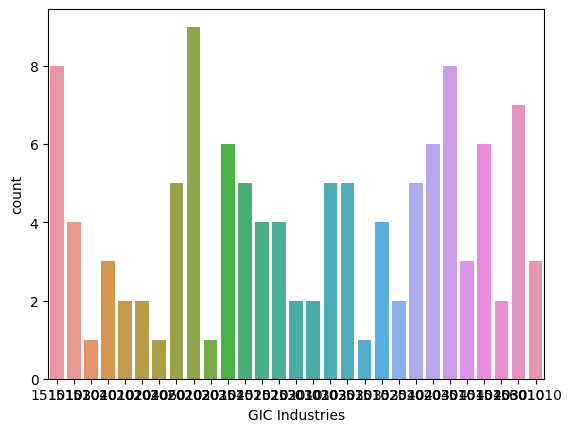

In [12]:
sns.countplot(data=fraud, x='GIC Industries')

In [21]:
#getting unique GIC id to filter from non-fraudulent dataset
unique_fraud_GIC = fraud['GIC Industries'].unique()


In [23]:
len(unique_fraud_GIC)

29

In [27]:
df_GIC=fraud.groupby(['GIC Industries']).sum()['Assets - Total'].to_frame().reset_index()

C:\Users\F14EIYF\AppData\Local\Temp\2\ipykernel_14984\2977380592.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_GIC=fraud.groupby(['GIC Industries']).sum()['Assets - Total'].to_frame().reset_index()


In [28]:
df_GIC

,GIC Industries,Assets - Total
0,151010,142707.691
1,151030,16369.536
2,151040,1.228
3,201010,2296.872
4,201020,60560.000
5,201040,164.362
6,201060,1809.534
7,202010,6458.297
8,202020,3801.926
9,203010,245.147


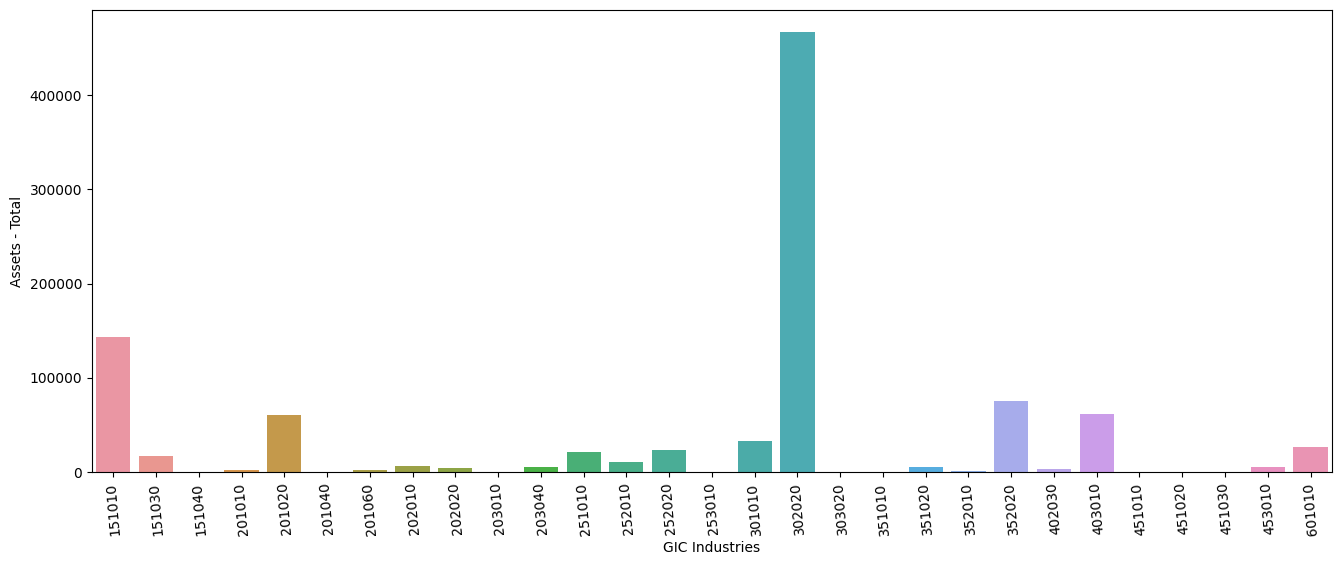

In [53]:
fig = plt.figure(figsize=(16,6))

ax=sns.barplot(data=df_GIC,x='GIC Industries', y='Assets - Total')
plt.xticks(rotation=95);

Read entire database

In [54]:
df = pd.read_excel("entire database.xl.xlsx", converters={'Global Company Key':str})

In [60]:
df[df['GIC Industries'].isin(df_GIC['GIC Industries'])]['Global Company Key'].unique().shape

(8072,)

There are 8072 company ids matching Fraudulent GIC Industry id

In [62]:
df[~df['GIC Industries'].isin(df_GIC['GIC Industries'])]['Global Company Key'].unique().shape

(11724,)

There are 11724 Company key not matching Fraudulent GIC industry Id